<a href="https://colab.research.google.com/github/QuintessentialChicken98/Colab-Projects/blob/main/Bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Bond Pricing:
par = 1000
c = 0.06
y = 0.08
n = list(range(0,6))

def bond_price(par, c, y, n):
  if len(n)>2:
    for i in n[:-1]:
      pv_coupons = c*par/(1+y)**i 
      pv_maturity = par+(c*par)/(1+y)**n[-1]
    price = pv_coupons+pv_maturity
  else: 
    pv_maturity = par+(c*par)/(1+y)**n[1]
    price = pv_maturity
  return price

bond_price(par=par, c=c, y=y, n=n)

1084.9367829898124

In [43]:
par = 1000
c = 0.06
y = 0.08
n = list(range(0,6))

# Macaulay Duration:
for i in n[:-1]:
  pv_coupons = c*par/(1+y)**i 
  pv_maturity = par+(c*par)/(1+y)**n[-1]
  price = pv_coupons+pv_maturity
  mac_coupons = i*c*par/(1+c)**i 
  mac_maturity = n[-1]*par+(c*par)/(1+c)**n[-1]
  num = mac_coupons+mac_maturity
mac_d = num/price
# Modified Duration: 
mod_d = (mac_d)/(1+(y/len(n)))


mac_d, mod_d
  

(4.825108754376378, 4.7616204812924785)

In [50]:
par = 1000
c = 0.06
y = 0.08
n = list(range(0,6))

for i in n[:-1]:
  pv_coupons = c*par/(1+y)**i 
  pv_maturity = par+(c*par)/(1+y)**n[-1]
  price = pv_coupons+pv_maturity
  
# Convexity:
for i in n:
  conv_coupons = (c*par/(1+y)**i)*(i**2+i) 
  conv_maturity = ((par+(c*par)/(1+y)**n[-1]))*(n[-1]**2+n[-1])
  num = conv_coupons+conv_maturity
denom = (price*(1+y)**2)
conv = num/denom
conv


25.642719896849894

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


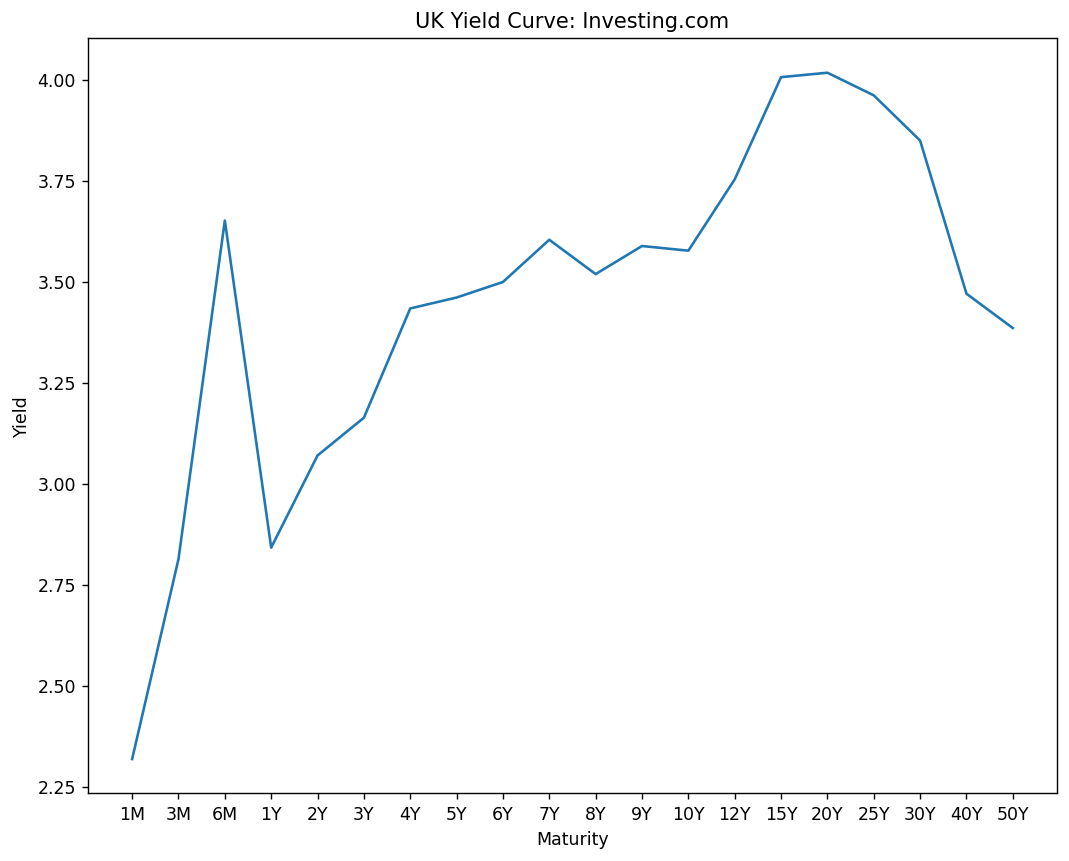

In [7]:
import requests, pandas as pd, matplotlib.pyplot as plt

url = 'https://uk.investing.com/rates-bonds/uk-government-bonds'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[0]
df['Name'] = df['Name'].str.replace(r'U.K. ', '')
yc = df.set_index('Name')

plt.figure(figsize = (10,8), dpi = 125)
plt.plot(yc['Yield'])
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.title('UK Yield Curve: Investing.com')
plt.show();